### Project :Bank Churn Prediction
### Objective : The aim is to estimate whether a bank's customers leave the bank or not.
### Details about the dataset: The dataset contains 10000 rows and 14 columns .Independent variables contain customer details and dependent variable contains the customer churn status.

### Importing the libraries

In [1]:
from IPython.display import Image
Image(url='https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [3]:
data = pd.read_csv('churn.csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Finding shape of our dataset

In [4]:
data.shape

(10000, 14)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


### Finding information about our dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Statistical summary about dataset

In [7]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

### Exploratory data analysis

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Dropping irrelevant features

In [14]:
churn=data[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
churn.head(10)

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2       0.00              1          1   
1          608  Female   41       1   83807.86              1          0   
2          502  Female   42       8  159660.80              3          1   
3          699  Female   39       1       0.00              2          0   
4          850  Female   43       2  125510.82              1          1   
5          645    Male   44       8  113755.78              2          1   
6          822    Male   50       7       0.00              2          1   
7          376  Female   29       4  115046.74              4          1   
8          501    Male   44       4  142051.07              2          0   
9          684    Male   27       2  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0  
5               0        149756.71       1  
6               1         10062.80       0  
7               0        119346.88       1  
8               1         74940.50       0  
9               1         71725.73       0

### Data Preprocessing

In [16]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
churn = pd.get_dummies(churn)
churn.head(10)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   
5          645   44       8  113755.78              2          1   
6          822   50       7       0.00              2          1   
7          376   29       4  115046.74              4          1   
8          501   44       4  142051.07              2          0   
9          684   27       2  134603.88              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Male  
0               1        101348.88       1            0  
1               1        112542.58       0            0  
2               0        113931.57       1            0  
3               0         93826.63       0            0  
4               1         79084.10       0            0  
5               0        149756.71       1            1  
6               1         10062.80       0            1  
7               0        119346.88       1            0  
8               1         74940.50       0            1  
9               1         71725.73       0            1

In [23]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male'],
      dtype='object')

In [18]:
import seaborn as sns

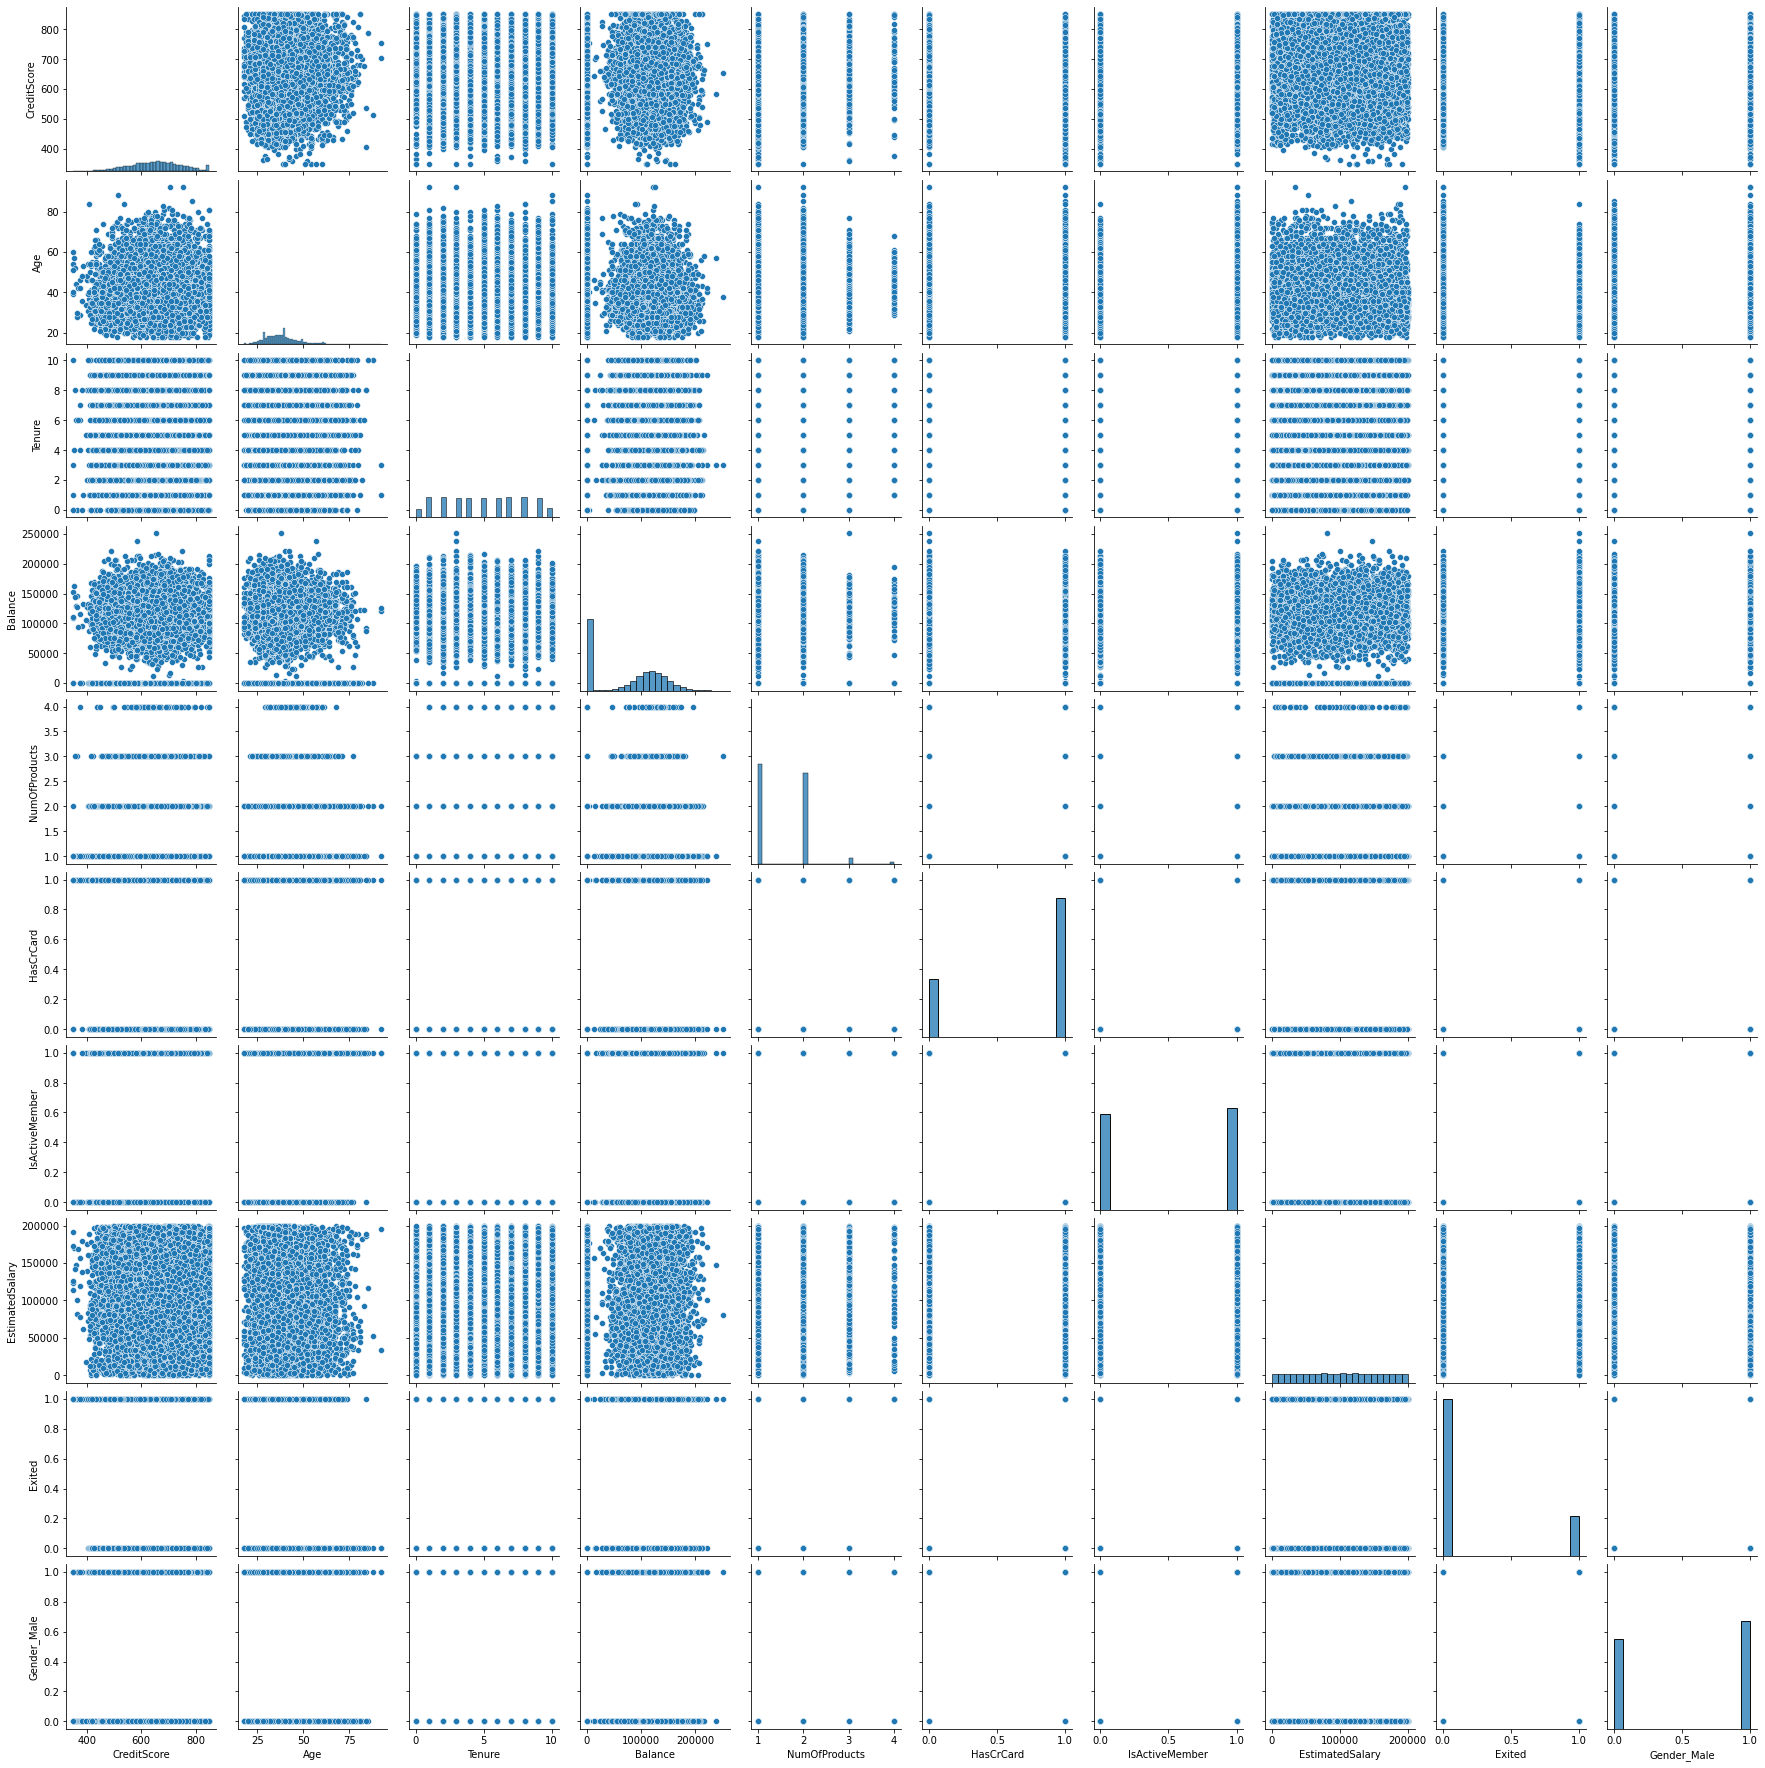

In [19]:
sns.pairplot(churn)

1    5457
0    4543
Name: Gender_Male, dtype: int64


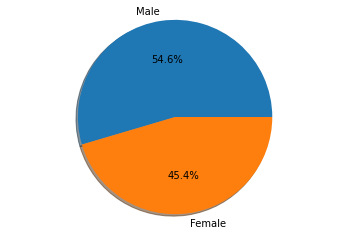

In [21]:
labels = ['Male','Female']
sizes = churn['Gender_Male'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

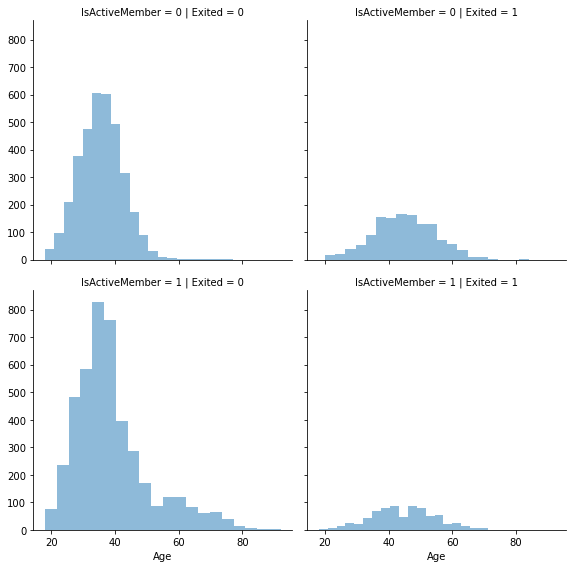

In [22]:
b = sns.FacetGrid(churn, row='IsActiveMember', col='Exited', height=4)
b.map(plt.hist,'Age', alpha=0.5, bins=20)
b.add_legend()
plt.show()

### Splitting into dependent and independent variables

In [24]:
X = churn.iloc[:, [0,1,2,3,4,5,6,7,9]]
y = churn.iloc[:, 8].values

In [25]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Gender_Male  
0               1        101348.88            0  
1               1        112542.58            0  
2               0        113931.57            0  
3               0         93826.63            0  
4               1         79084.10            0

In [27]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### Splitting the dataset into training and testing data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [29]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print('X train shape:\t', X_train.shape)
print('y train shape:\t', y_train.shape)
print('X test shape:\t', X_test.shape)
print('y test shape:\t', y_test.shape)

X train shape:	 (8000, 9)
y train shape:	 (8000,)
X test shape:	 (2000, 9)
y test shape:	 (2000,)


In [31]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.97481699,
         1.36766974,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.97481699,
         1.6612541 ,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -1.02583358,
        -0.25280688,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.02583358,
        -0.1427649 , -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -1.02583358,
        -0.05082558,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.97481699,
        -0.81456811,  0.91324755]])

In [32]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.13836537 0.24871983 0.11349811 0.12926532 0.14313576 0.02823994
 0.04076585 0.14378863 0.01422119]


### Building the ML Model

#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
y_pred1 = rf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
cm = confusion_matrix(y_test,y_pred1)
print(cm)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

[[1545   62]
 [ 224  169]]
0.857
0.7316017316017316


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred2 = log.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.814
0.5945945945945946


#### Support vector classifier

In [42]:
from sklearn import svm
svm = svm.SVC()

In [43]:
svm.fit(X_train,y_train)

SVC()

In [48]:
y_pred3 = svm.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8535
0.7777777777777778


#### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred4 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8345
0.6291666666666667


#### Decision tree classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred5 = dtree.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.779
0.4431554524361949


#### Naive bayes classifier

In [53]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred6 = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.8265
0.676923076923077


### Visualising the model

In [56]:
final_data = pd.DataFrame({'Models':['RF','LR','SVC','KNN','DC','NB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})
final_data

Models     ACC
0     RF  0.8570
1     LR  0.8140
2    SVC  0.8535
3    KNN  0.8345
4     DC  0.7790
5     NB  0.8265

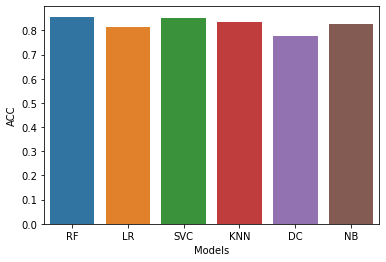

In [57]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])
plt.show()

In [58]:
final_data = pd.DataFrame({'Models':['RF','LR','SVC','KNN','DC','NB'],
                          'PRE':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})
final_data

Models       PRE
0     RF  0.731602
1     LR  0.594595
2    SVC  0.777778
3    KNN  0.629167
4     DC  0.443155
5     NB  0.676923

### Visualisation

#### Plotting the heatmap of correlation between features

<AxesSubplot:>

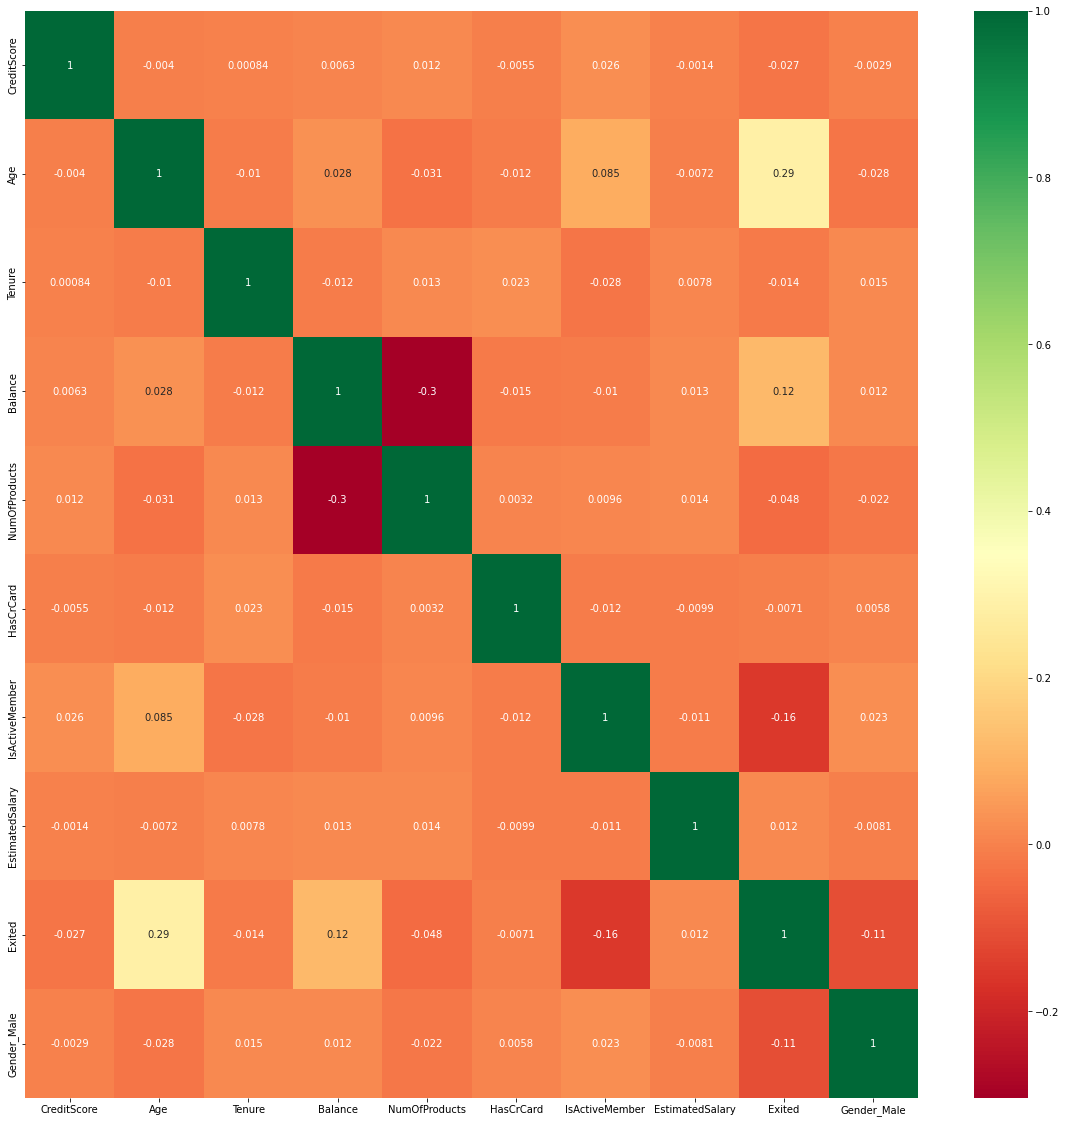

In [59]:
corrmat = churn.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(churn[top_corr_features].corr(), annot=True, cmap='RdYlGn')

#### Bar chart using plotly

In [60]:
import plotly.graph_objs as go
import plotly.io as pio

# create a bar chart for the number of churned customers by gender
gender_counts = churn.groupby(['Gender_Male', 'Exited']).size().unstack()
gender_bar = go.Bar(x=gender_counts.index, y=gender_counts[1], name='Churned')
gender_bar_not = go.Bar(x=gender_counts.index, y=gender_counts[0], name='Not Churned')

# create a layout for the chart
layout = go.Layout(title='Churned Customers by Gender',
                   xaxis=dict(title='Gender'),
                   yaxis=dict(title='Number of Customers'))

# combine the chart and layout into a figure object
fig = go.Figure(data=[gender_bar, gender_bar_not], layout=layout)

# show the plot
pio.show(fig)

#### Pie chart using plotly

In [62]:
import plotly.graph_objs as go
import plotly.io as pio

# count the number of customers who exited and who didn't exit
exit_counts = churn['Exited'].value_counts()
exit_labels = ['Retained', 'Exited']

# create a pie chart
pie_chart = go.Pie(labels=exit_labels, values=exit_counts.values)

# create a layout for the chart
layout = go.Layout(title='Customer Churn',
                   width=500,
                   height=500)

# combine the chart and layout into a figure object
fig = go.Figure(data=[pie_chart], layout=layout)

# show the plot
pio.show(fig)


#### histogram

In [64]:
import plotly.graph_objs as go
import plotly.io as pio


# create a histogram
histogram = go.Histogram(x=churn['Age'], nbinsx=20)

# create a layout for the chart
layout = go.Layout(title='Age Distribution',
                   xaxis=dict(title='Age'),
                   yaxis=dict(title='Count'))

# combine the chart and layout into a figure object
fig = go.Figure(data=[histogram], layout=layout)

# show the plot
pio.show(fig)

#### Tree map

In [65]:
import plotly.express as px
import pandas as pd

# create a tree map for the Geography, Gender and Age columns
fig = px.treemap(churn, path=['Gender_Male', 'Age'],
                 values='Balance',
                color = 'Gender_Male')
fig.update_layout(title = 'Balance by Gender and Age of the customers')

# show the plot
fig.show()


### Save the model - once we are confident enough to test the model in production - ready environment ,we save the models using pickle

In [66]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)